You are working as a data scientist in a global finance company. Over the years, the company has collected basic bank details and gathered a lot of credit-related information. The management wants to build an intelligent system to segregate the
people into credit score brackets to reduce the manual efforts. Given a person’s credit-related information, build a machine learning model that can classify the credit score.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('credit_score.csv')
df.head()

C:\Users\Sravanthi\AppData\Local\Temp\ipykernel_22136\242999580.py:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('credit_score.csv')


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [4]:
df = df.drop(columns=["ID","Customer_ID","Name","SSN","Type_of_Loan","Credit_History_Age"])
df.shape

(100000, 22)

In [5]:
df


,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,January,23,Scientist,19114.12,1824.843333,3,4,3,4,3,...,4.0,_,809.98,26.822620,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,February,23,Scientist,19114.12,NaN,3,4,3,4,-1,...,4.0,Good,809.98,31.944960,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,March,-500,Scientist,19114.12,NaN,3,4,3,4,3,...,4.0,Good,809.98,28.609352,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,April,23,Scientist,19114.12,NaN,3,4,3,4,5,...,4.0,Good,809.98,31.377862,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,May,23,Scientist,19114.12,1824.843333,3,4,3,4,6,...,4.0,Good,809.98,24.797347,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,April,25,Mechanic,39628.99,3359.415833,4,6,7,2,23,...,3.0,_,502.38,34.663572,No,35.104023,60.97133255718485,High_spent_Large_value_payments,479.866228,Poor
99996,May,25,Mechanic,39628.99,3359.415833,4,6,7,2,18,...,3.0,_,502.38,40.565631,No,35.104023,54.18595028760385,High_spent_Medium_value_payments,496.65161,Poor
99997,June,25,Mechanic,39628.99,3359.415833,4,6,5729,2,27,...,3.0,Good,502.38,41.255522,No,35.104023,24.02847744864441,High_spent_Large_value_payments,516.809083,Poor
99998,July,25,Mechanic,39628.99,3359.415833,4,6,7,2,20,...,3.0,Good,502.38,33.638208,No,35.104023,251.67258219721603,Low_spent_Large_value_payments,319.164979,Standard


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Month                     100000 non-null  object 
 1   Age                       100000 non-null  object 
 2   Occupation                100000 non-null  object 
 3   Annual_Income             100000 non-null  object 
 4   Monthly_Inhand_Salary     84998 non-null   float64
 5   Num_Bank_Accounts         100000 non-null  int64  
 6   Num_Credit_Card           100000 non-null  int64  
 7   Interest_Rate             100000 non-null  int64  
 8   Num_of_Loan               100000 non-null  object 
 9   Delay_from_due_date       100000 non-null  int64  
 10  Num_of_Delayed_Payment    92998 non-null   object 
 11  Changed_Credit_Limit      100000 non-null  object 
 12  Num_Credit_Inquiries      98035 non-null   float64
 13  Credit_Mix                100000 non-null  ob

In [7]:
df.describe()

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
count,84998.000000,100000.000000,100000.00000,100000.000000,100000.000000,98035.000000,100000.000000,100000.000000
mean,4194.170850,17.091280,22.47443,72.466040,21.068780,27.754251,32.285173,1403.118217
std,3183.686167,117.404834,129.05741,466.422621,14.860104,193.177339,5.116875,8306.041270
min,303.645417,-1.000000,0.00000,1.000000,-5.000000,0.000000,20.000000,0.000000
25%,1625.568229,3.000000,4.00000,8.000000,10.000000,3.000000,28.052567,30.306660
50%,3093.745000,6.000000,5.00000,13.000000,18.000000,6.000000,32.305784,69.249473
75%,5957.448333,7.000000,7.00000,20.000000,28.000000,9.000000,36.496663,161.224249
max,15204.633333,1798.000000,1499.00000,5797.000000,67.000000,2597.000000,50.000000,82331.000000


In [8]:
df.isnull().sum()

Month                           0
Age                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

In [9]:
## change dtypes of columns

df['Age'] = df['Age'].str.replace('_','')
df['Age'] = df['Age'].astype(int)

In [10]:
df['Occupation'] = df['Occupation'].replace('________',np.nan)

In [11]:
df['Annual_Income'] = df['Annual_Income'].str.replace('_','')
df['Annual_Income'] = df['Annual_Income'].astype(float)

In [12]:
df['Num_of_Loan'] = df['Num_of_Loan'].str.replace('_','')
df['Num_of_Loan'] = df['Num_of_Loan'].astype(int)

In [13]:
df['Num_of_Delayed_Payment'] = df['Num_of_Delayed_Payment'].str.replace('_','')
df['Num_of_Delayed_Payment'] = df['Num_of_Delayed_Payment'].astype(float)

In [14]:
df['Credit_Score'] = df['Credit_Score'].replace(['Poor','Standard','Good'],[0,1,2])

In [15]:
df['Monthly_Balance'] = df['Monthly_Balance'].str.replace('_','')
df['Monthly_Balance'] = df['Monthly_Balance'].astype(float)

In [16]:
df['Payment_Behaviour'] = df['Payment_Behaviour'].replace('!@9#%8',np.nan)       

In [17]:
df['Amount_invested_monthly'] = df['Amount_invested_monthly'].str.replace('_','')
df['Amount_invested_monthly'] = df['Amount_invested_monthly'].astype(float)

In [18]:
df['Payment_of_Min_Amount'] = df['Payment_of_Min_Amount'].replace('NM','No')
df['Payment_of_Min_Amount'] = df['Payment_of_Min_Amount'].replace(['Yes','No'],[1,0])

In [19]:
df['Outstanding_Debt'] = df['Outstanding_Debt'].str.replace('_','')
df['Outstanding_Debt'] = df['Outstanding_Debt'].astype(float)

In [20]:
df['Credit_Mix'] = df['Credit_Mix'].replace('_',np.nan)
df['Credit_Mix'] = df['Credit_Mix'].replace(['Standard','Good','Bad'],[1,2,0])

In [21]:
df['Changed_Credit_Limit'] = df['Changed_Credit_Limit'].replace('_',np.nan)
df['Changed_Credit_Limit'] = df['Changed_Credit_Limit'].astype(float)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Month                     100000 non-null  object 
 1   Age                       100000 non-null  int32  
 2   Occupation                100000 non-null  object 
 3   Annual_Income             100000 non-null  float64
 4   Monthly_Inhand_Salary     84998 non-null   float64
 5   Num_Bank_Accounts         100000 non-null  int64  
 6   Num_Credit_Card           100000 non-null  int64  
 7   Interest_Rate             100000 non-null  int64  
 8   Num_of_Loan               100000 non-null  int32  
 9   Delay_from_due_date       100000 non-null  int64  
 10  Num_of_Delayed_Payment    92998 non-null   float64
 11  Changed_Credit_Limit      97909 non-null   float64
 12  Num_Credit_Inquiries      98035 non-null   float64
 13  Credit_Mix                79805 non-null   fl

In [23]:
df.isna().sum()

Month                           0
Age                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit         2091
Num_Credit_Inquiries         1965
Credit_Mix                  20195
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour            7600
Monthly_Balance              2868
Credit_Score                    0
dtype: int64

In [26]:
df = df.fillna(method = 'ffill' , axis =0)
df = df.fillna(method = 'bfill' , axis =0)

In [27]:
df.isna().sum()

Month                       0
Age                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

In [28]:
col = list(df.columns)
col

['Month',
 'Age',
 'Occupation',
 'Annual_Income',
 'Monthly_Inhand_Salary',
 'Num_Bank_Accounts',
 'Num_Credit_Card',
 'Interest_Rate',
 'Num_of_Loan',
 'Delay_from_due_date',
 'Num_of_Delayed_Payment',
 'Changed_Credit_Limit',
 'Num_Credit_Inquiries',
 'Credit_Mix',
 'Outstanding_Debt',
 'Credit_Utilization_Ratio',
 'Payment_of_Min_Amount',
 'Total_EMI_per_month',
 'Amount_invested_monthly',
 'Payment_Behaviour',
 'Monthly_Balance',
 'Credit_Score']

C:\Users\Sravanthi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


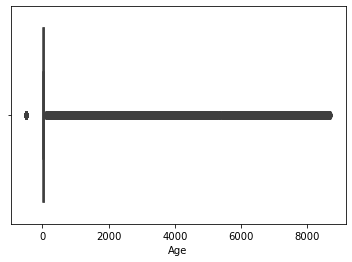

In [31]:
sns.boxplot(df['Age'])
plt.show()

In [32]:
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1

data = df[(df['Age'] >= Q1 - 1.5*IQR) & (df['Age'] <= Q3 + 1.5*IQR)]

C:\Users\Sravanthi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


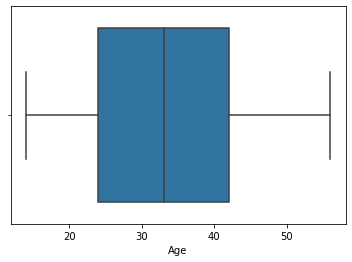

In [33]:
sns.boxplot(data['Age'])
plt.show()

In [35]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['Month'] = le.fit_transform(df['Month'])
df['Occupation'] = le.fit_transform(df['Occupation'])
df['Payment_Behaviour'] = le.fit_transform(df['Payment_Behaviour']) 


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Month                     100000 non-null  int32  
 1   Age                       100000 non-null  int32  
 2   Occupation                100000 non-null  int32  
 3   Annual_Income             100000 non-null  float64
 4   Monthly_Inhand_Salary     100000 non-null  float64
 5   Num_Bank_Accounts         100000 non-null  int64  
 6   Num_Credit_Card           100000 non-null  int64  
 7   Interest_Rate             100000 non-null  int64  
 8   Num_of_Loan               100000 non-null  int32  
 9   Delay_from_due_date       100000 non-null  int64  
 10  Num_of_Delayed_Payment    100000 non-null  float64
 11  Changed_Credit_Limit      100000 non-null  float64
 12  Num_Credit_Inquiries      100000 non-null  float64
 13  Credit_Mix                100000 non-null  fl

In [37]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

col_list = []
for col in df.columns:
    if((df[col].dtype != 'object') & (col != 'Credit_Score')):
        col_list.append(col)
        
X = df[col_list]

vif_data = pd.DataFrame()
vif_data['Features'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values , i) for i in range(len(X.columns))]
vif_data

,Features,VIF
0,Month,0.300012
1,Age,0.974661
2,Occupation,0.275594
3,Annual_Income,0.985001
4,Monthly_Inhand_Salary,0.365970
5,Num_Bank_Accounts,0.979247
6,Num_Credit_Card,0.970567
7,Interest_Rate,0.976430
8,Num_of_Loan,0.997697
9,Delay_from_due_date,0.332213


In [38]:
x = df.drop(columns = ['Credit_Score'])
y = df['Credit_Score']

In [39]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.2 , random_state = 42)

In [40]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(80000, 21)
(20000, 21)
(80000,)
(20000,)


In [41]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [43]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(x_train,y_train)
pred = lr.predict(x_test)
pred

array([2, 0, 2, ..., 1, 1, 1], dtype=int64)

In [44]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test , pred))

0.6185


In [45]:
pd.DataFrame({'Actual_y':y_test , 'Predict_y':pred})

,Actual_y,Predict_y
75721,2,2
80184,0,0
19864,2,2
76699,0,0
92991,2,2
...,...,...
32595,1,1
29313,1,1
37862,0,1
53421,1,1


In [46]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
pred_dt = dt.predict(x_test)
pred_dt

array([2, 0, 2, ..., 0, 1, 0], dtype=int64)

In [47]:
print(accuracy_score(y_test , pred_dt))

0.69125


In [48]:
pd.DataFrame({'Actual_y':y_test , 'Predict_y':pred_dt})

,Actual_y,Predict_y
75721,2,2
80184,0,0
19864,2,2
76699,0,0
92991,2,2
...,...,...
32595,1,1
29313,1,1
37862,0,0
53421,1,1


In [50]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(x_train,y_train)
pred_rf = rf.predict(x_test)
pred_rf

array([2, 0, 2, ..., 1, 1, 0], dtype=int64)

In [51]:
print(accuracy_score(y_test , pred_rf))

0.79685


In [52]:
pd.DataFrame({'Actual_y':y_test , 'Predict_y':pred_rf})

,Actual_y,Predict_y
75721,2,2
80184,0,0
19864,2,2
76699,0,0
92991,2,2
...,...,...
32595,1,1
29313,1,1
37862,0,1
53421,1,1
